In [47]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
name = f'./data/N2/dDSL_N2_n3_U5_T1.hdf5'
f = h5py.File(name, 'r')
print(list(f.keys()))
print(list(f['SFW'].keys()))
print(list(f['hamiltonian'].keys()))
print(list(f['hamiltonian/sc_params'].keys()))

['SFW', 'hamiltonian']
['Ds_tot_conv', 'conv_sfwtens', 'conv_sfwterms', 'tot_sfwtens', 'tot_sfwterms']
['Es', 'sc_params']
['dels', 'mus', 'ons']


In [55]:
N=2

Uarr = np.linspace(0.00001, 10, 30)
Tarr = np.linspace(0,0.3*N,100)
n = N**2-N+1

num_files = 645

sfw_dic_N2 = {'U':[], 'T':[], 'Ds_tot':[], 'Ds_conv':[]}
sfw_arr = np.zeros((num_files,2), dtype=complex)
delta_arr = np.zeros((num_files,n), dtype=complex)
mu_arr = np.zeros((num_files,1), dtype=complex)
ons_arr = np.zeros((num_files,n), dtype=complex)
UT_arr = np.zeros((num_files,2))
c=0
for Ui in range(len(Uarr)):
    Uv = Uarr[Ui]
    for Ti in range(len(Tarr)):
        
        name = f'./data/N{N}/dDSL_N{N}_n3_U{Ui+1}_T{Ti+1}.hdf5'
        #print(name)
        try: 
            f = h5py.File(name, 'r')
        except: 
            break

        Tv = Tarr[Ti]
        UT_arr[c] = [Uv,Tv]

        delta_arr[c] = list(f['hamiltonian/sc_params/dels'][:,-1])
        mu_arr[c] = f['hamiltonian/sc_params/mus'][0,-1]
        ons_arr[c] = list(f['hamiltonian/sc_params/ons'][:,-1])
        sfw_arr[c] = list(f['SFW/Ds_tot_conv'])

        c+=1
        


In [69]:
Dsgeom_arr = sfw_arr.T[0]-sfw_arr.T[1]


In [70]:
Dstot_arr = sfw_arr.T[0,:600].reshape((6,100))
Dsconv_arr = sfw_arr.T[1,:600].reshape((6,100))
Dsgeom_arr = Dsgeom_arr[:600].reshape((6,100))

In [61]:
dDSLdic = {'U': UT_arr.T[0], 'T': UT_arr.T[1], 'Dstot': sfw_arr.T[0], 'Dsconv':sfw_arr.T[1], 'Dsgeom':Dsgeom_arr}
dDSL_df = pd.DataFrame.from_dict(dDSLdic)

In [62]:
dDSL_df.head(10)

,U,T,Dstot,Dsconv,Dsgeom
0,0.00001,0.000000,3.351920e-06-1.118858e- 33j,4.121980e-12-8.575596e- 28j,3.351916e-06+8.575585e- 28j
1,0.00001,0.006061,3.167614e-18+4.184098e- 35j,9.243760e-21-1.922461e- 36j,3.158370e-18+4.376344e- 35j
2,0.00001,0.012121,2.417045e-18-4.770489e- 34j,1.023423e-20-5.508292e- 36j,2.406811e-18-4.715406e- 34j
3,0.00001,0.018182,5.863416e-19+7.936073e- 34j,3.179465e-35-1.776119e- 20j,5.863416e-19+1.776119e- 20j
4,0.00001,0.024242,2.696490e-18+1.113871e- 33j,1.843169e-20-7.761065e- 35j,2.678058e-18+1.191481e- 33j
5,0.00001,0.030303,2.614983e-34-1.031748e- 18j,8.769956e-36-9.509037e- 20j,2.527284e-34-9.366578e- 19j
6,0.00001,0.036364,5.760850e-19+2.266691e- 34j,1.388454e-34+5.837137e- 20j,5.760850e-19-5.837137e- 20j
7,0.00001,0.042424,3.445177e-19+1.412832e- 33j,9.662532e-21+1.550167e- 33j,3.348552e-19-1.373344e- 34j
8,0.00001,0.048485,1.937485e-18+3.833438e- 36j,4.252813e-35+1.135612e- 19j,1.937485e-18-1.135612e- 19j
9,0.00001,0.054545,4.769909e-34+5.292609e- 19j,1.362518e-34-1.262603e- 19j,3.407391e-34+6.555212e- 19j


In [65]:
Ulist = dDSL_df.U.unique()
Tlist = dDSL_df['T'].unique()

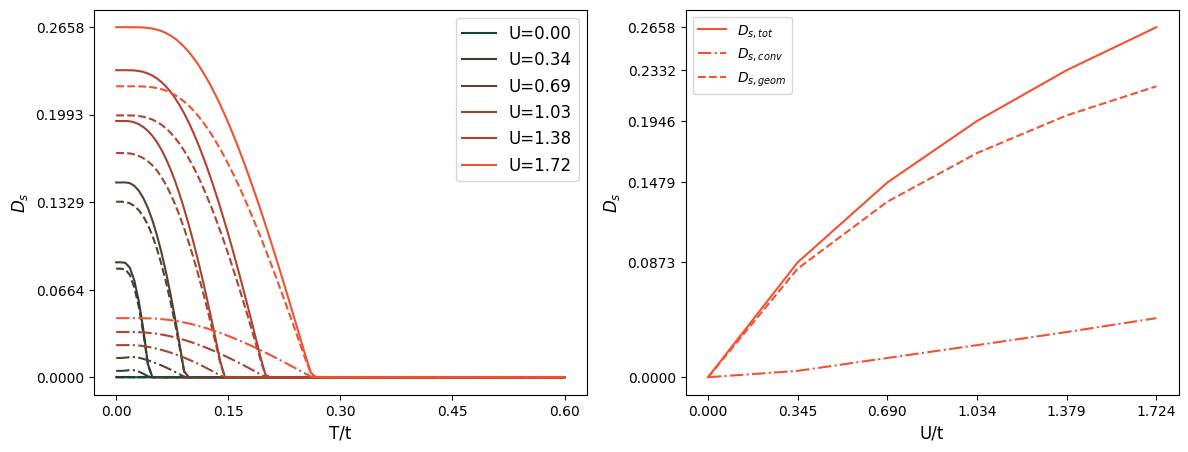

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

ax[0].set_xlabel('T/t', size='large')
ax[0].set_ylabel(r'$D_s$', size='large')
ax[0].set_xticks(np.linspace(0,Tlist[-1],5), size='large')
ax[0].set_yticks(np.linspace(0,Dstot_arr[-1,0],5),size='large')

ax[1].set_xlabel('U/t', size='large')
ax[1].set_ylabel(r'$D_s$', size='large')
ax[1].set_xticks(Ulist, size='large')
ax[1].set_yticks(Dstot_arr[:,0],size='large')

cli = ['#154130', '#354130', '#554130', '#A54530', '#B34130', '#F55130']
for i in range(6):
    ax[0].plot(Tlist, Dstot_arr[i], c= cli[i], label=f'U={Ulist[i]:.2f}')
    ax[0].plot(Tlist, Dsconv_arr[i], linestyle='dashdot', c = cli[i])
    ax[0].plot(Tlist, Dsgeom_arr[i], linestyle='--', c = cli[i])
ax[0].legend(fontsize='large')

ax[1].plot(Ulist[:-1], Dstot_arr[:,0], c= cli[-1], label=r'$D_{s,tot}$')
ax[1].plot(Ulist[:-1], Dsconv_arr[:,0], linestyle='dashdot', c = cli[-1], label=r'$D_{s,conv}$')
ax[1].plot(Ulist[:-1], Dsgeom_arr[:,0], linestyle='--', c = cli[-1], label=r'$D_{s,geom}$')
ax[1].legend()

In [106]:
s1 = len(Ulist)-1
Tarr_fine = np.linspace(0,Tlist[-1],1000)
yarr = np.zeros((s1,1000))

for i in range(s1):
    yarr[i] = np.interp(Tarr_fine, Tlist, Dstot_arr[i])



C:\Users\atsch\AppData\Local\Temp\ipykernel_4024\3204355453.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  yarr[i] = np.interp(Tarr_fine, Tlist, Dstot_arr[i])


In [107]:
T_bkt = []
for i in range(s1):
    T_bkt.append(list([Tarr_fine[np.abs(Tarr_fine*8/np.pi-yarr[i])<0.002]][0])[0])# for y in yarr[1]]

In [108]:
T_bkt

[0.0,
 0.026426426426426425,
 0.047447447447447444,
 0.06546546546546546,
 0.08168168168168168,
 0.0966966966966967]

In [116]:
BKT_arr = np.zeros((s1, 5))
BKT_arr[:,0] = Ulist[:s1]
BKT_arr[:,1] = T_bkt
BKT_arr[:,2] = Dstot_arr[:,0]
BKT_arr[:,3] = Dsgeom_arr[:,0]
BKT_arr[:,4] = Dsconv_arr[:,0]

C:\Users\atsch\AppData\Local\Temp\ipykernel_4024\3928831195.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  BKT_arr[:,2] = Dstot_arr[:,0]
C:\Users\atsch\AppData\Local\Temp\ipykernel_4024\3928831195.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  BKT_arr[:,3] = Dsgeom_arr[:,0]
C:\Users\atsch\AppData\Local\Temp\ipykernel_4024\3928831195.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  BKT_arr[:,4] = Dsconv_arr[:,0]


In [118]:
csvname = f'./data/agglomeratedSFW/N{N}_U_Tbkt_Dstot_Dsgeom_Dsconv.csv' 
np.savetxt(csvname, BKT_arr, delimiter=",")

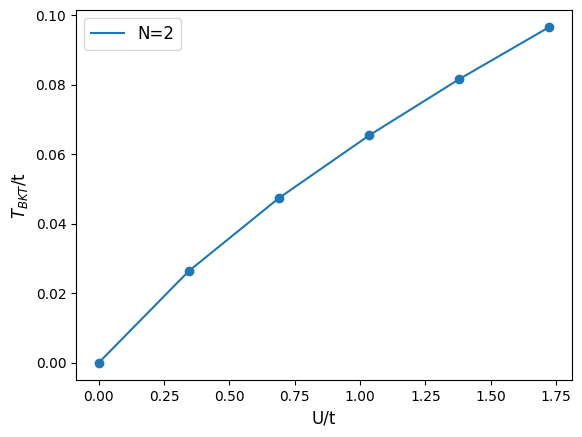

In [113]:
plt.xlabel('U/t', size='large')
plt.ylabel(r'$T_{BKT}$/t', size='large')

plt.plot(Ulist[:-1], T_bkt, label='N=2')
plt.scatter(Ulist[:-1], T_bkt)

plt.legend(fontsize='large')